# Part 1A: Experimentation with Basic Models to Predict Forex Spot Price
This code demonstrates how to view time series data with pandas and various methods of sampling plus using this type of sampling on the following basic models:

*   Baseline
*   Linear Regression
*   Ridge Regression
*   Gradient Boosting

# Notes for user:
*   This notebook will use the Foreign Exchange Spot Price of a currency pair to predict the Spot Price of that currency pair.

*What to ask user before using this application:*
*   What currency pair are you interested in? USD/GBP (This layout means that the base currency is USD)


# Imports


In [83]:
!pip install git+https://github.com/tensorflow/docs

import pathlib
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

# Modelling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Graphs
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn')
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6

# Modeling metrics
from sklearn import metrics



  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-iwfhg447
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-iwfhg447
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0f517a95ab079b1a994986d1cfe8a85357f6654f3_-cp36-none-any.whl size=133174 sha256=bce8e44ca2f76461294c35a0c376e7540cf0980a8166d506f46ec0eea67370fb
  Stored in directory: /tmp/pip-ephem-wheel-cache-d3m_zhx2/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs
2.3.0


# Data Collection

In [84]:
dataset_data= pd.read_csv('GBP_USD.csv', na_values = "?", comment='\t', skipinitialspace=True)
dataset = dataset_data.copy()
dataset = dataset.fillna(method='ffill')
dataset.head()

,Date,Price,Open,High,Low,Change %
0,"Jul 31, 2020",1.3090,1.3098,1.3171,1.3069,-0.04%
1,"Jul 30, 2020",1.3095,1.2997,1.3103,1.2944,0.76%
2,"Jul 29, 2020",1.2996,1.2932,1.3013,1.2911,0.49%
3,"Jul 28, 2020",1.2932,1.2882,1.2953,1.2838,0.38%
4,"Jul 27, 2020",1.2882,1.2786,1.2903,1.2780,0.72%


# Data Preprocessing / Data Cleaning & Collating

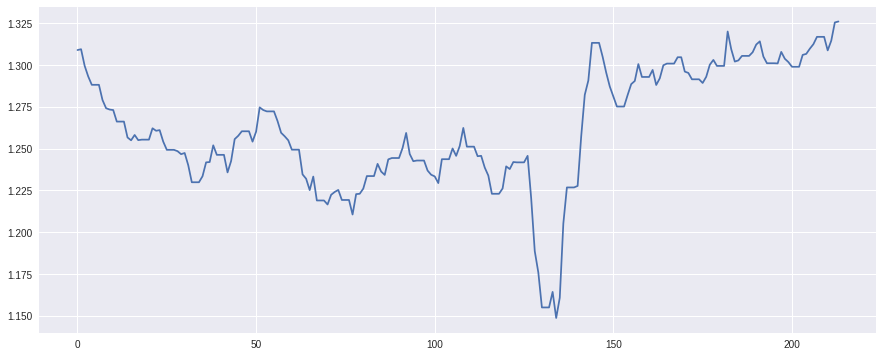

In [85]:
rcParams['figure.figsize'] = 15,6
dataset["Price"].plot()

In [86]:
# Confirm our merge matches n rows for both dataframes
dataset.shape

(214, 6)

In [87]:
dataset = pd.DataFrame(dataset, columns = ['Date', 'Price']) 
dataset.head()

,Date,Price
0,"Jul 31, 2020",1.3090
1,"Jul 30, 2020",1.3095
2,"Jul 29, 2020",1.2996
3,"Jul 28, 2020",1.2932
4,"Jul 27, 2020",1.2882


# Split train & test set


In [88]:
# Look back leading up to the 7 days before the day we care about

# X variables/ features that we care about
# Y variable/ output/ what we want to predict
look_back=7
num_samples=len(dataset)-look_back

# Get indices of access for the data
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(look_back+1).astype(np.int)

data = dataset["Price"].values[indices] # Create the 2D matrix of training samples
x = data[:,:-1] # Each row represents 7 days in the past
y = data[:,-1] # Each output value represents the 13rd day

In [89]:
# not data frame anymore now it is a list
x

array([[1.309 , 1.3095, 1.2996, ..., 1.2882, 1.2882, 1.2882],
       [1.3095, 1.2996, 1.2932, ..., 1.2882, 1.2882, 1.2791],
       [1.2996, 1.2932, 1.2882, ..., 1.2882, 1.2791, 1.2742],
       ...,
       [1.3067, 1.3098, 1.3125, ..., 1.3169, 1.3169, 1.3088],
       [1.3098, 1.3125, 1.3169, ..., 1.3169, 1.3088, 1.3146],
       [1.3125, 1.3169, 1.3169, ..., 1.3088, 1.3146, 1.3255]])

In [90]:
y

array([1.2791, 1.2742, 1.2734, 1.2731, 1.2662, 1.2662, 1.2662, 1.2567,
       1.255 , 1.2582, 1.2551, 1.2554, 1.2554, 1.2554, 1.2622, 1.2607,
       1.2611, 1.2542, 1.2493, 1.2493, 1.2493, 1.2485, 1.2467, 1.2474,
       1.2401, 1.2299, 1.2299, 1.2299, 1.2335, 1.2418, 1.242 , 1.252 ,
       1.2463, 1.2463, 1.2463, 1.2358, 1.2426, 1.2557, 1.2577, 1.2604,
       1.2604, 1.2604, 1.2542, 1.2602, 1.2747, 1.2731, 1.2723, 1.2723,
       1.2723, 1.2665, 1.2595, 1.2574, 1.255 , 1.2494, 1.2494, 1.2494,
       1.2346, 1.232 , 1.2252, 1.2333, 1.219 , 1.219 , 1.219 , 1.2166,
       1.2224, 1.2241, 1.2253, 1.2193, 1.2193, 1.2193, 1.2106, 1.2228,
       1.223 , 1.2261, 1.2336, 1.2336, 1.2336, 1.2409, 1.2363, 1.2343,
       1.2436, 1.2444, 1.2444, 1.2444, 1.2504, 1.2594, 1.2468, 1.2425,
       1.2429, 1.2429, 1.2429, 1.2369, 1.2344, 1.2334, 1.2294, 1.2437,
       1.2437, 1.2437, 1.2501, 1.2457, 1.2516, 1.2624, 1.2512, 1.2512,
       1.2512, 1.2455, 1.2457, 1.2387, 1.2339, 1.223 , 1.223 , 1.223 ,
      

### Random State to Split

In [91]:
# Uncomment if wish to use this method instead
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# random_state helps maintain reproducibility
# data is also shuffled and split in a stratified fashion with class labels, helps with more accurate metrics later on
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

### Manual Way to Split – Better

In [92]:
# 80% of my data
split_fraction=0.8
ind_split=int(split_fraction*num_samples)

In [93]:
# x features and y features
# test and train
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

In [94]:
x_train.shape, x_test.shape

((165, 7), (42, 7))

In [95]:
y_train.shape, y_test.shape

((165,), (42,))

# Modelling

*   Helper function to output the performance of the particular 
*   It helps streamline the evaluation part of this. 
*   Goal is to evaluate several different algorithms, so we start off on the most basic type of prediction that can make the most simple type of algorithm and then we will work out way up in complexity and gauge the performance uptake as you move up the spectrum of complexity.
*   Reason for doing this: This is a cost of complexity
*   In terms of the robustness of that particular model in real world environment and in terms of the interpretability in understanding what is driving the output of that particular model.
*   According to readings, algorithms with higher complexity generally get better performance as you are training however the best model in training is not always going to be the best model in production/ real world environment. Therefore it is important to understand these trade-offs.
*   If you want to do gradient boosting you should at least be rewarded for that additional complexity you are taking on.

In [96]:
# Evaluate the performance of the models we are using
# Taking the predictions from a particular model run and its evaluating it against the y test score.
# Take the mod_pred and evaluate it against the y_test

def get_performance (model_pred):
  #Function returns standard performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
  
  
# This method will plot out model and show us the accurarcy (predictions versus the actuals) 
def get_plot (model_pred):
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='red', linewidth=2)

### Method #1 Baseline


*   We begin with the model basic algorithm
*   Rule of algorithm: Let your prediction be the most recent observation
*   Example, if we are taking in 12 features and we want to predict 13, we look at the one day previous which is day 12. Idea: "The prediction for tomorrow is going to be the most recent close today".
*   We run the preformance, we hope that any other model would be better than this however it is often that a simple rule is all you need instead of other algorithms of higher complexity
*    We then plot the actuals versus predicted
*    The red line is out perfect prediction
*    A good model is going to output plots as close to the line as possible. If the plots fell on that line then you would be predicting with a high level of accuracy.

In [97]:
# let your prediction be the most recent observation
# looking at the one day previous 
# np.roll-> similar to shift for a dataframe
y_pred_lag=np.roll(y_test,1)

In [98]:
# np.roll(y,1)

In [99]:
# This is the performance reltive to this very simlpe approach
# Sometimes a simple rule will suffice and this is all you need
get_performance(y_pred_lag)

Mean Absolute Error: 0.0042
Mean Squared Error: 0.0001
Root Mean Squared Error: 0.0076


Text(0, 0.5, 'Price of USD/GBP & Gas Prices')

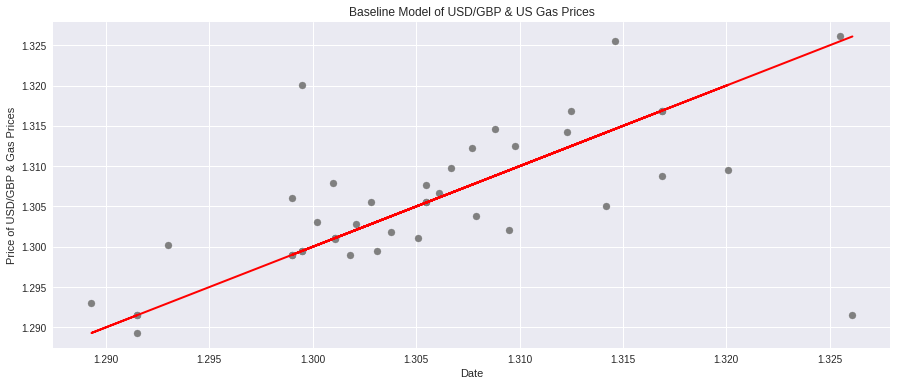

In [100]:
# Why cant I print dates on the bottom of my graph?
# Error 3: your graph is using only the y values of USD/GBP price to Oil Prices, if you want dates you need to include these

rcParams['figure.figsize'] = 15,6
get_plot(y_pred_lag)
plt.title('Baseline Model of USD/GBP & US Gas Prices')
plt.xlabel('Date')
plt.ylabel('Price of USD/GBP & Gas Prices')
# plt.plot_date(dates,y_pred_gb, linestyle ='solid')

### Method #2 Linear Regression

In [101]:
# assigning the linear regression model
model_lr=LinearRegression()
# fitting the linear regression model to xtrain, xytrain
model_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
#help
# ?model_lr.fit()

In [103]:
# x variable and predict the y 
y_pred_lr=model_lr.predict(x_test)

In [104]:
# check how they compare to the baseline
# not a big difference at all only in root mean
# not great
get_performance(y_pred_lr)

Mean Absolute Error: 0.0055
Mean Squared Error: 0.0001
Root Mean Squared Error: 0.0071


Text(0, 0.5, 'Price')

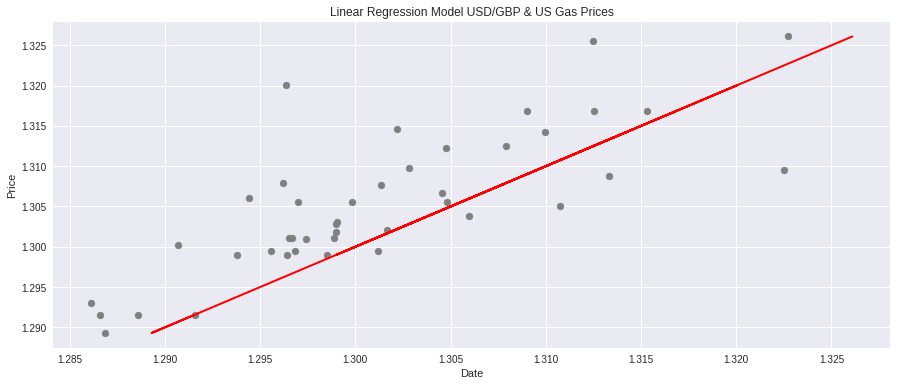

In [105]:
# Why cant I print dates on the bottom of my graph?
rcParams['figure.figsize'] = 15,6
get_plot(y_pred_lr)
# plt.plot(y_pred_gb)
plt.title('Linear Regression Model USD/GBP & US Gas Prices')
plt.xlabel('Date')
plt.ylabel('Price')
# dates = np.array(dateFormatting['Date'])
# plt.plot_date(dates,y_pred_gb, linestyle ='solid')

In [106]:
get_performance(y_pred_lr)

Mean Absolute Error: 0.0055
Mean Squared Error: 0.0001
Root Mean Squared Error: 0.0071


In [107]:
# this should list our 12 co-efficients for all of our variables
# most recent day: 1.18024445
# as you can see other values are - and small, this is why the baseline 
# is so good because the previous day is the msot important value
# change is marginal
# only focus on the the last one
# problem: only print the last output
model_lr.coef_

array([ 0.03453129, -0.18003452,  0.17816105, -0.18252879,  0.12889993,
       -0.31583507,  1.26848815])



```
# This is formatted as code
```
### Method #4 Ridge Regression

In [108]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

#generate predictions
y_pred_ridge=model_ridge.predict(x_test)

In [109]:
# look at difference in baseline and ridge regression
# trying to figure out which one of the features is the most prominent
get_performance(y_pred_ridge)

Mean Absolute Error: 0.0333
Mean Squared Error: 0.0012
Root Mean Squared Error: 0.0341


Text(0, 0.5, 'Price')

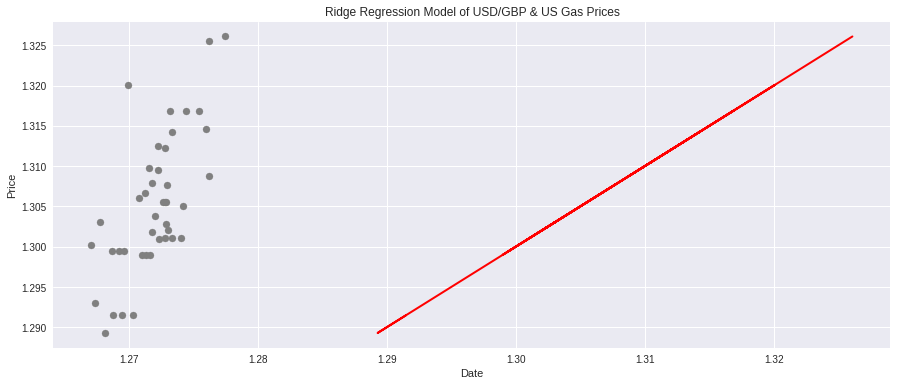

In [110]:
# Why cant I print dates on the bottom of my graph?
rcParams['figure.figsize'] = 15,6
get_plot(y_pred_ridge)
# plt.plot(y_pred_gb)
plt.title('Ridge Regression Model of USD/GBP & US Gas Prices')
plt.xlabel('Date')
plt.ylabel('Price')
# dates = np.array(dateFormatting['Date'])
# plt.plot_date(dates,y_pred_gb, linestyle ='solid')

In [111]:
# this should list our 12 co-efficients for all of our variables
# most recent day: 0.09432427
# change is marginal
# only focus on the the last one
# problem: only print the last output
# limit the number of days your looking back
# what is the trend: higher/lower?
# keep same features but apply different features
# k folds cross validation? in terms of splitting the data
model_ridge.coef_

array([0.02628969, 0.03578102, 0.04660197, 0.05788469, 0.07053212,
       0.08332592, 0.0961733 ])

### Method #4 Lasso Regression

In [112]:
model_lasso = Lasso()
model_lasso.fit(x_train, y_train)

#generate predictions
y_pred_lasso=model_lasso.predict(x_test)

In [113]:
get_performance(y_pred_lasso)

Mean Absolute Error: 0.0561
Mean Squared Error: 0.0032
Root Mean Squared Error: 0.0568


Text(0, 0.5, 'Price')

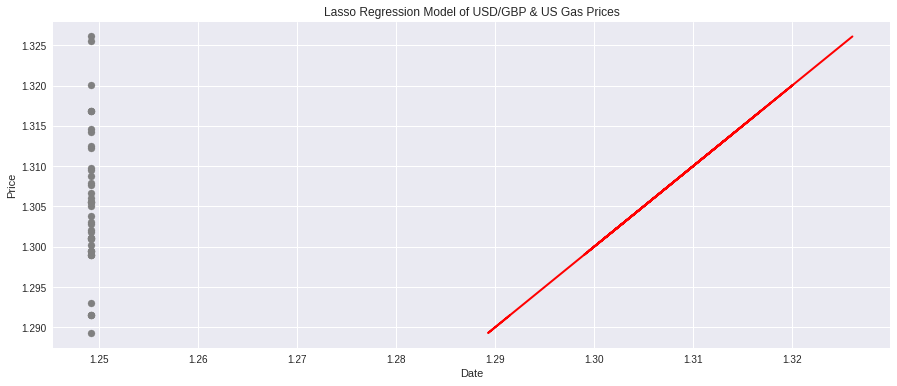

In [114]:
rcParams['figure.figsize'] = 15,6
get_plot(y_pred_lasso)
plt.title('Lasso Regression Model of USD/GBP & US Gas Prices')
plt.xlabel('Date')
plt.ylabel('Price')

In [115]:
model_lasso.coef_

array([0., 0., 0., 0., 0., 0., 0.])

### Method #4 Random Forest

In [116]:
#model_random_forest = RandomForestRegressor(max_depth=2, random_state=0)
model_random_forest = RandomForestRegressor()
model_random_forest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [117]:
y_pred_random_forest=model_random_forest.predict(x_test)

In [118]:
get_performance(y_pred_random_forest)

Mean Absolute Error: 0.0088
Mean Squared Error: 0.0001
Root Mean Squared Error: 0.0113


Text(0, 0.5, 'Price')

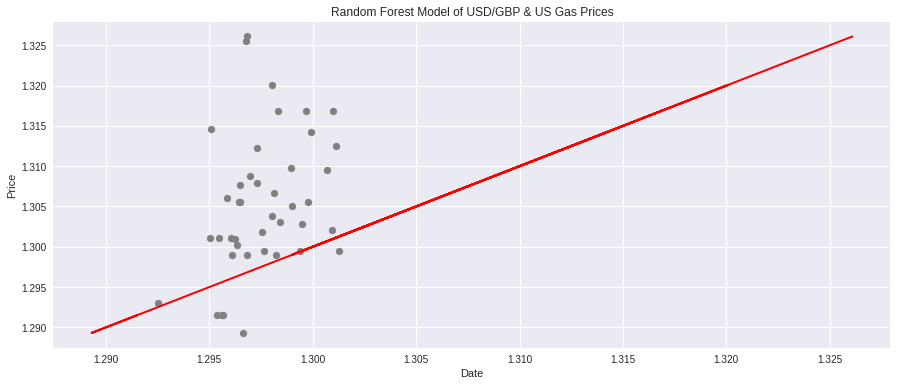

In [119]:
rcParams['figure.figsize'] = 15,6
get_plot(y_pred_random_forest)
plt.title('Random Forest Model of USD/GBP & US Gas Prices')
plt.xlabel('Date')
plt.ylabel('Price')

### Method #5 Gradient Boosting Trees


*   Tree shape not linear. Known for higher performance but more complex.
*   Called a boosting/ sequential tree because the base model, we are adding decision trees sequentially. We are boosting on the base model sequentially. 
*   Outline of Gradient Boosting:

1.   Step 1. Y hat: Bare Model. Get predictions. Computing the average values.
2.   Step 2. R1(MSE): Performance comparison against MSE etc.
3.   Step 3. R2(DT1): Construct decision tree which takes in fuel price, result of the MSE as a feature. We then pass through our features again to our tree instead of the MSE. 
4.   Prediction - DT1. If too close this is wrong as we should have a model that has low variance and low bias. Low bias but high variance. To prevent this, we will add a learning rate. Learning rate is always 0-1.
5.   Step 4. DT2: We keep creating trees and the output will get smaller. This will reduce the error.


##### Math
* Independent feature/Input: fuel_price 
* Dependent feature/ Output: usa/gbp dataset
* Loss function: MSE
* No. of trees you want in gradient boosting algorithm
* Formula:

In [121]:
# Model #2 - Gradient Boosting Trees
# not linear, tree based
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train, y_train)

# Infer
y_pred_gb = model_gb.predict(x_test)

In [122]:
get_performance(y_pred_gb)

Mean Absolute Error: 0.0091
Mean Squared Error: 0.0001
Root Mean Squared Error: 0.012


Text(0, 0.5, 'Price')

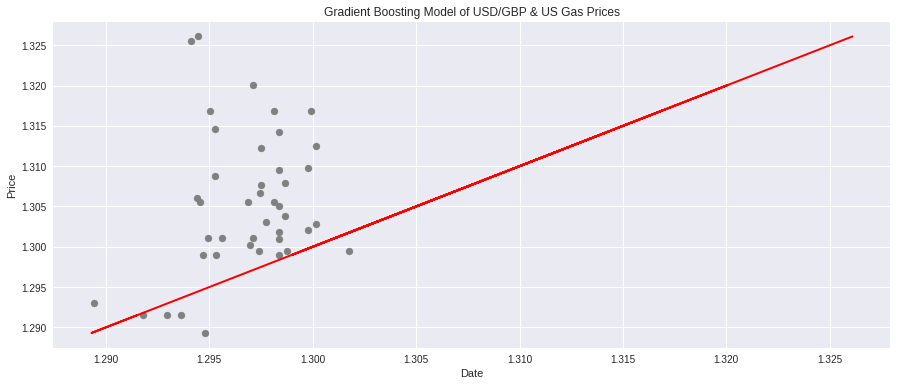

In [123]:
# Why cant I print dates on the bottom of my graph?
rcParams['figure.figsize'] = 15,6
get_plot(y_pred_gb)
# plt.plot(y_pred_gb)
plt.title('Gradient Boosting Model of USD/GBP & US Gas Prices')
plt.xlabel('Date')
plt.ylabel('Price')
# dates = np.array(dateFormatting['Date'])
# plt.plot_date(dates,y_pred_gb, linestyle ='solid')

# Comparison

*   Map the difference betwee the predicted and the actual value
*   Shows the difference between the actual and the predicted for all the models
*   I wanted to take the absolute value because I didnt want to have negatives and positives. 
*   If you see a pattern where your modelling is consistenty overestimating to the upside or you are conssitently underestimating to the downside and maybe other users would want to see that but what I want to do is view the overall error in terms of how much we miss in terms of dollars.

In [128]:
# We create a dataframe 
df_comp=pd.DataFrame({"lag":np.absolute(y_test-y_pred_lag), 
              "lr":np.absolute(y_test-y_pred_lr), 
              "ridge":np.absolute(y_test-y_pred_ridge),
              "lasso":np.absolute(y_test-y_pred_lasso),
              "rf":np.absolute(y_test-y_pred_random_forest),
              "gb":np.absolute(y_test-y_pred_gb)})

In [129]:
df_comp.head()

,lag,lr,ridge,lasso,rf,gb
0,0.0346,0.000097,0.021128,0.042266,0.004089,0.002146
1,0.0000,0.004903,0.021990,0.042266,0.003881,0.001429
2,0.0000,0.002920,0.022725,0.042266,0.004145,0.000284
3,0.0022,0.002465,0.021140,0.040066,0.007344,0.005505
4,0.0037,0.006856,0.025616,0.043766,0.000486,0.003591


In [130]:
# go over again 51:22
y_pred_lag

array([1.3261, 1.2915, 1.2915, 1.2915, 1.2893, 1.293 , 1.3002, 1.3031,
       1.2995, 1.2995, 1.2995, 1.3201, 1.3095, 1.3021, 1.3028, 1.3055,
       1.3055, 1.3055, 1.3077, 1.3123, 1.3142, 1.3051, 1.3011, 1.3011,
       1.3011, 1.301 , 1.3079, 1.3038, 1.3018, 1.299 , 1.299 , 1.299 ,
       1.3061, 1.3067, 1.3098, 1.3125, 1.3169, 1.3169, 1.3169, 1.3088,
       1.3146, 1.3255])

(11.0, 20.0)

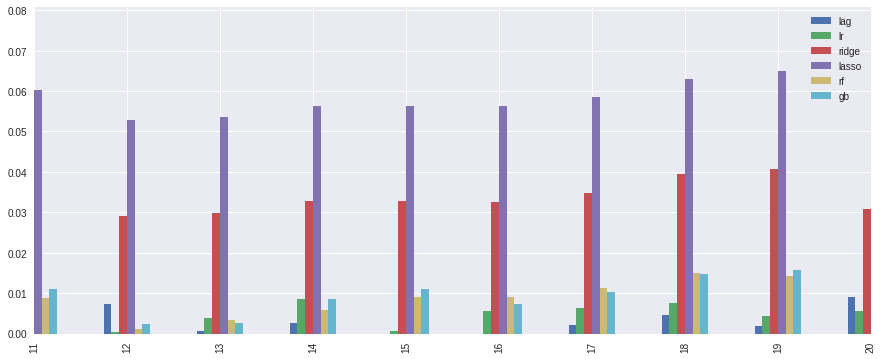

In [131]:
df_comp.plot.bar(figsize=(15, 6))
# show me days 0 to 10
plt.xlim(11,20)
# unsure why this line doesnt work
#plt.ylim(0,10)

# Conclusion and next steps

Explored 4 different algorithms, ranging from simple to complex:


*   Lag (Previous day's price)
*   Linear Regression 
*   Ridge Regression
*   Gradient Boosting Trees

In conclusion it seems that Linear Regression gives us the best performance with the least complexity. Next steps might include adding additional features such as trend and recent volatility (go over).


